In [1]:
a = 5
print('a before ', a, type(a))
a = " has some value"
print('a after', a, type(a))

a before  5 <class 'int'>
a after  has some value <class 'str'>


In [8]:
b = 15
print(b, type(b))


15 <class 'int'>


In [7]:
a= "boom"
print(a,type(a))

boom <class 'str'>


In [9]:
print("Hello")

Hello


In [11]:
import numpy as np
print(np.__version__)

1.26.4


In [12]:
# import in file to use its features.
import pandas as pd

# check version
print(pd.__version__)

2.2.2


In [13]:
import matplotlib
import matplotlib.pyplot as plt

# check version
print(matplotlib.__version__)

3.8.4


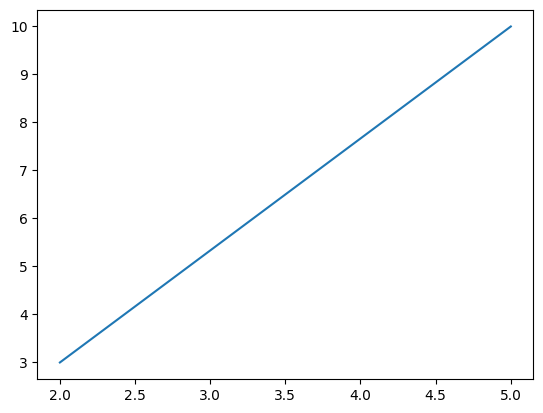

In [15]:
# Plot line from point(2, 3) to (3, 5)

# Create two numpy arrays: one with x-coordinate values 
# and other with y-coordinate values
xpoints = np.array([2, 5])
ypoints = np.array([3, 10])

# use plot() method in matplotlib module 
# plot takes two arguments: first-array containing x-coordinates
# second-array containing y-coordinates
plt.plot(xpoints, ypoints)

# show() method to visualize the plot done
plt.show()

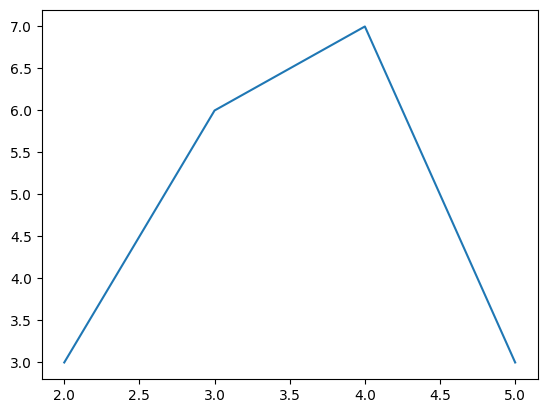

In [19]:
# Plot line from point(2, 3) to (3, 5) to (4, 6) to (5, 3)
xpoints = np.array([2, 3, 4, 5])
ypoints = np.array([3, 6, 7, 3])

plt.plot(xpoints, ypoints)
plt.show()